# Basic RAG Demo
The purpose of this notebook is to demonstrate the capabilities of the basic RAG graph defined in `src/dsi_rag_qa/rag_framework/basic_graph.py`.

In [1]:
import nest_asyncio
nest_asyncio.apply()

In [ ]:
from dsi_rag_qa.rag_framework.basic_graph import create_basic_workflow
from dsi_rag_qa.utils.data_ingestion_utils import load_docs_from_url, BASE_URL
from dsi_rag_qa.utils.embedding_utils import create_faiss_retriever
from dsi_rag_qa.utils.prompt_utils import base_system_prompt
from dsi_rag_qa.utils.prompt_utils import create_response_chain

## Define the Basic Workflow

In [10]:
workflow = create_basic_workflow()

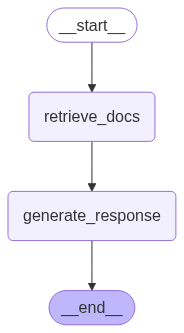

In [12]:
workflow

## Load & Store the Pages from the DSI Website

In [ ]:
# Load the documents from the DSI website
docs = await load_docs_from_url(url=BASE_URL)

Loaded 13 documents from https://datascience.uchicago.edu/education/masters-programs/ms-in-applied-data-science/


In [ ]:
# Store the documents in a FAISS vector store
# and generate a retriever to pass to the workflow
vector_retriever, vector_store = create_faiss_retriever(docs)

In [ ]:
# Define a response chain that will 
# parse the final response after the 
# retrieval and summary steps

# To use a different prompt,
# define a new variable in a new cell that 
# contains the prompt string and replace
# `base_system_prompt` with that variable.
response_chain = create_response_chain(prompt=base_system_prompt)

## Query the Graph

In [ ]:
query = "Is the MS in Applied Data Science program STEM/OPT eligible?"

In [ ]:
# Define the start state for the workflow
start_state = {
    "query": query,
    "vector_retriever": vector_retriever,
    "response_chain": response_chain,
}

In [21]:
response = workflow.invoke(start_state)

### Output the Response Text

In [22]:
print(f"Query: {response['query']}")
print(f"Response: {response['response']}")

Query: Is the MS in Applied Data Science program STEM/OPT eligible?
Response:  Yes, the full-time, In-Person MS in Applied Data Science program is STEM/OPT eligible. For more information, please visit the University of Chicago Office of International Affairs website.


In [23]:
for source in response['source_documents']:
    print(f"Source: {source.metadata['source']}")
    print(f"Content: {source.page_content[:200]}...")  # Print first 200 characters of content
    print("-" * 80)  # Separator for readability

Source: https://datascience.uchicago.edu/education/masters-programs/ms-in-applied-data-science/faqs/
Content: Is the Master's in Applied Data Science an approved OPT/STEM program?									

Yes. Please visit the University of Chicago Office of International Affairs website for more information.

										Doe...
--------------------------------------------------------------------------------
Source: https://datascience.uchicago.edu/education/masters-programs/ms-in-applied-data-science/in-person-program/
Content: Your Career Success
Take the next step to advance your career with UChicago’s MS in Applied Data Science.
The In-Person program admits full- and part-time students for entrance in Autumn quarter annua...
--------------------------------------------------------------------------------
Source: https://datascience.uchicago.edu/education/masters-programs/ms-in-applied-data-science/faqs/
Content: Is the GRE or GMAT required for the Master's in Applied Data Science program?									
